# Test Dimer distortion

In [3]:
from pymatgen.core.structure import Structure
from doped.generation import DefectsGenerator

bulk = Structure.from_file("./tests/data/vasp/CdTe/CdTe_Bulk_Primitive_POSCAR")  # CdTe
defect_gen = DefectsGenerator(bulk)

Generating DefectEntry objects: 100.0%|██████████| [00:06,  14.43it/s]

Vacancies    Charge States    Conv. Cell Coords    Wyckoff
-----------  ---------------  -------------------  ---------
v_Cd         [-2,-1,0,+1]     [0.000,0.000,0.000]  4a
v_Te         [-1,0,+1,+2]     [0.250,0.250,0.250]  4c

Substitutions    Charge States          Conv. Cell Coords    Wyckoff
---------------  ---------------------  -------------------  ---------
Cd_Te            [0,+1,+2,+3,+4]        [0.250,0.250,0.250]  4c
Te_Cd            [-4,-3,-2,-1,0,+1,+2]  [0.000,0.000,0.000]  4a

Interstitials    Charge States          Conv. Cell Coords    Wyckoff
---------------  ---------------------  -------------------  ---------
Cd_i_C3v         [0,+1,+2]              [0.625,0.625,0.625]  16e
Cd_i_Td_Cd2.83   [0,+1,+2]              [0.750,0.750,0.750]  4d
Cd_i_Td_Te2.83   [0,+1,+2]              [0.500,0.500,0.500]  4b
Te_i_C3v         [-2,-1,0,+1,+2,+3,+4]  [0.625,0.625,0.625]  16e
Te_i_Td_Cd2.83   [-2,-1,0,+1,+2,+3,+4]  [0.750,0.750,0.750]  4d
Te_i_Td_Te2.83   [-2,-1,0,+1,+2,+3,+4]  

In [4]:
defect_gen.defect_entries.keys()

dict_keys(['v_Cd_-2', 'v_Cd_-1', 'v_Cd_0', 'v_Cd_+1', 'v_Te_-1', 'v_Te_0', 'v_Te_+1', 'v_Te_+2', 'Cd_Te_0', 'Cd_Te_+1', 'Cd_Te_+2', 'Cd_Te_+3', 'Cd_Te_+4', 'Te_Cd_-4', 'Te_Cd_-3', 'Te_Cd_-2', 'Te_Cd_-1', 'Te_Cd_0', 'Te_Cd_+1', 'Te_Cd_+2', 'Cd_i_C3v_0', 'Cd_i_C3v_+1', 'Cd_i_C3v_+2', 'Cd_i_Td_Cd2.83_0', 'Cd_i_Td_Cd2.83_+1', 'Cd_i_Td_Cd2.83_+2', 'Cd_i_Td_Te2.83_0', 'Cd_i_Td_Te2.83_+1', 'Cd_i_Td_Te2.83_+2', 'Te_i_C3v_-2', 'Te_i_C3v_-1', 'Te_i_C3v_0', 'Te_i_C3v_+1', 'Te_i_C3v_+2', 'Te_i_C3v_+3', 'Te_i_C3v_+4', 'Te_i_Td_Cd2.83_-2', 'Te_i_Td_Cd2.83_-1', 'Te_i_Td_Cd2.83_0', 'Te_i_Td_Cd2.83_+1', 'Te_i_Td_Cd2.83_+2', 'Te_i_Td_Cd2.83_+3', 'Te_i_Td_Cd2.83_+4', 'Te_i_Td_Te2.83_-2', 'Te_i_Td_Te2.83_-1', 'Te_i_Td_Te2.83_0', 'Te_i_Td_Te2.83_+1', 'Te_i_Td_Te2.83_+2', 'Te_i_Td_Te2.83_+3', 'Te_i_Td_Te2.83_+4'])

In [5]:
defects = {
    'v_Cd_0': defect_gen.defect_entries['v_Cd_0'],
    'v_Cd_-1': defect_gen.defect_entries['v_Cd_-1'],
    'v_Cd_-2': defect_gen.defect_entries['v_Cd_-2'],
}

In [6]:
from shakenbreak.input import Distortions

Dist = Distortions(
    defects,
    bond_distortions=["Dimer",]
)

Oxidation states were not explicitly set, thus have been guessed as {'Cd': 2.0, 'Te': -2.0}. If this is unreasonable you should manually set oxidation_states


In [7]:
Dist.bond_distortions

['Dimer']

In [8]:
Dist.distortion_metadata

{'distortion_parameters': {'distortion_increment': None,
  'bond_distortions': ['Dimer'],
  'local_rattle': False,
  'mc_rattle_parameters': {'stdev': 0.28333683853583175}},
 'defects': {}}

In [9]:
defects_dict, distortion_metadata = Dist.apply_distortions()

Applying ShakeNBreak... Will apply the following bond distortions: ['Dimer']. Then, will rattle with a std dev of 0.28 Å 


Defect: v_Cd
Number of missing electrons in neutral state: 2

Defect v_Cd in charge state: 0. Number of distorted neighbours: 2

Defect v_Cd in charge state: -1. Number of distorted neighbours: 1

Defect v_Cd in charge state: -2. Number of distorted neighbours: 0


local_env.py:4133: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
local_env.py:3927: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.


In [10]:
Dist.write_vasp_files()

Applying ShakeNBreak... Will apply the following bond distortions: ['Dimer']. Then, will rattle with a std dev of 0.28 Å 


Defect: v_Cd
Number of missing electrons in neutral state: 2

Defect v_Cd in charge state: 0. Number of distorted neighbours: 2

Defect v_Cd in charge state: -1. Number of distorted neighbours: 1

Defect v_Cd in charge state: -2. Number of distorted neighbours: 0


({'v_Cd': {'defect_type': 'vacancy',
   'defect_site': PeriodicSite: Cd (6.543, 6.543, 6.543) [0.5, 0.5, 0.5],
   'defect_supercell_site': PeriodicSite: Cd (6.543, 6.543, 6.543) [0.5, 0.5, 0.5],
   'defect_multiplicity': 1,
   'charges': {0: {'structures': {'Unperturbed': Structure Summary
      Lattice
          abc : 13.086768 13.086768 13.086768
       angles : 90.0 90.0 90.0
       volume : 2241.2856479961474
            A : 13.086768 0.0 0.0
            B : 0.0 13.086768 0.0
            C : 0.0 0.0 13.086768
          pbc : True True True
      PeriodicSite: Cd (6.543, 0.0, 0.0) [0.5, 0.0, 0.0]
      PeriodicSite: Cd (9.815, 3.272, 0.0) [0.75, 0.25, 0.0]
      PeriodicSite: Cd (9.815, 0.0, 3.272) [0.75, 0.0, 0.25]
      PeriodicSite: Cd (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
      PeriodicSite: Cd (3.272, 3.272, 0.0) [0.25, 0.25, 0.0]
      PeriodicSite: Cd (6.543, 6.543, 0.0) [0.5, 0.5, 0.0]
      PeriodicSite: Cd (9.815, 9.815, 0.0) [0.75, 0.75, 0.0]
      PeriodicSite: Cd (3.272, 0.0,

# TODO
1. Update plotting module
2. Test full workflow 

# Tests

In [1]:
from shakenbreak.distortions import apply_dimer_distortion
from pymatgen.core.structure import Structure
import os

VASP_CDTE_DATA_DIR= "./tests/data/vasp/CdTe"
struc = Structure.from_file(os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_POSCAR"))
output = apply_dimer_distortion(struc, frac_coords=[0,0,0])

local_env.py:4141: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
local_env.py:3934: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.


In [2]:
output.keys()

dict_keys(['distorted_structure', 'num_distorted_neighbours', 'distorted_atoms', 'undistorted_structure', 'defect_frac_coords'])

In [3]:
output["num_distorted_neighbours"], output["distorted_atoms"]

(2, [(62, 'Te'), (51, 'Te')])

In [3]:
output['undistorted_structure']

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0, 0.0, 6.543) [0.0, 0.0, 0.5]
PeriodicSite: Cd (0.0, 6.543, 0.0) [0.0, 0.5, 0.0]
PeriodicSite: Cd (0.0, 6.543, 6.543) [0.0, 0.5, 0.5]
PeriodicSite: Cd (6.543, 0.0, 0.0) [0.5, 0.0, 0.0]
PeriodicSite: Cd (6.543, 0.0, 6.543) [0.5, 0.0, 0.5]
PeriodicSite: Cd (6.543, 6.543, 0.0) [0.5, 0.5, 0.0]
PeriodicSite: Cd (6.543, 6.543, 6.543) [0.5, 0.5, 0.5]
PeriodicSite: Cd (0.0, 3.272, 3.272) [0.0, 0.25, 0.25]
PeriodicSite: Cd (0.0, 3.272, 9.815) [0.0, 0.25, 0.75]
PeriodicSite: Cd (0.0, 9.815, 3.272) [0.0, 0.75, 0.25]
PeriodicSite: Cd (0.0, 9.815, 9.815) [0.0, 0.75, 0.75]
PeriodicSite: Cd (6.543, 3.272, 3.272) [0.5, 0.25, 0.25]
PeriodicSite: Cd (6.543, 3.272, 9.815) [0.5, 0.25, 0.75]
PeriodicSite: Cd (6.543, 9.815, 3.272) [0.5, 0.75, 0.25]
PeriodicSite:

In [6]:
output['distorted_structure'].to(fmt="poscar", filename=os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_Dimer_Distortion_Unrattled_POSCAR"))

'Cd31 Te32\n1.0\n  13.0867679999999993    0.0000000000000000    0.0000000000000000\n   0.0000000000000000   13.0867679999999993    0.0000000000000000\n   0.0000000000000000    0.0000000000000000   13.0867679999999993\nCd Te\n31 32\ndirect\n   0.0000000000000000    0.0000000000000000    0.5000000000000000 Cd\n   0.0000000000000000    0.5000000000000000    0.0000000000000000 Cd\n   0.0000000000000000    0.5000000000000000    0.5000000000000000 Cd\n   0.5000000000000000    0.0000000000000000    0.0000000000000000 Cd\n   0.5000000000000000    0.0000000000000000    0.5000000000000000 Cd\n   0.5000000000000000    0.5000000000000000    0.0000000000000000 Cd\n   0.5000000000000000    0.5000000000000000    0.5000000000000000 Cd\n   0.0000000000000000    0.2500000000000000    0.2500000000000000 Cd\n   0.0000000000000000    0.2500000000000000    0.7500000000000000 Cd\n   0.0000000000000000    0.7500000000000000    0.2500000000000000 Cd\n   0.0000000000000000    0.7500000000000000    0.75000000000

In [8]:
len(output['distorted_structure'])

63

In [5]:
from shakenbreak.analysis import get_homoionic_bonds

get_homoionic_bonds(output['distorted_structure'],elements=["Te",])

Te(51): {'Te(62)': '2.0 A'} 



{'Te(51)': {'Te(62)': '2.0 A'}}

# Test input

In [26]:
from shakenbreak.distortions import apply_dimer_distortion
from pymatgen.core.structure import Structure
import os

VASP_CDTE_DATA_DIR= "./tests/data/vasp/CdTe"
struc = Structure.from_file(os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_POSCAR"))

In [27]:
from shakenbreak import input
from monty.serialization import loadfn

CdTe_bulk_struc = Structure.from_file(
    os.path.join(VASP_CDTE_DATA_DIR, "CdTe_Bulk_Supercell_POSCAR")
)

cdte_doped_defect_dict = loadfn(
    os.path.join(VASP_CDTE_DATA_DIR, "CdTe_defects_dict.json")
)
cdte_doped_reduced_defect_gen = loadfn(
    os.path.join(VASP_CDTE_DATA_DIR, "reduced_CdTe_defect_gen.json")
)
cdte_defects = {}
# Refactor to dict of DefectEntrys objects, with doped/PyCDT names
for defects_type, defect_dict_list in cdte_doped_defect_dict.items():
    if "bulk" not in defects_type:
        for defect_dict in defect_dict_list:
            cdte_defects[defect_dict["name"]] = [
                input._get_defect_entry_from_defect(
                    defect=input.generate_defect_object(
                        single_defect_dict=defect_dict,
                        bulk_dict=cdte_doped_defect_dict["bulk"],
                    ),
                    charge_state=charge,
                )
                for charge in defect_dict["charges"]
            ]
cdte_defect_list = sum(list(cdte_defects.values()), [])
V_Cd_dict = cdte_doped_defect_dict["vacancies"][0]
Int_Cd_2_dict = cdte_doped_defect_dict["interstitials"][1]
# Refactor to Defect() objects
V_Cd = input.generate_defect_object(
    V_Cd_dict, cdte_doped_defect_dict["bulk"]
)
V_Cd_entry = input._get_defect_entry_from_defect(
    V_Cd, V_Cd.user_charges[0]
)

## Test `_apply_rattle_bond_distortions`

In [22]:
import numpy as np

V_Cd_struc = Structure.from_file(
    os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_POSCAR")
)
sorted_distances = np.sort(V_Cd_struc.distance_matrix.flatten())
d_min = 0.8 * sorted_distances[len(V_Cd_struc) + 20]
V_Cd_distorted_dict = input._apply_rattle_bond_distortions(
    V_Cd_entry,
    num_nearest_neighbours=2,
    distortion_factor="dimer",
    d_min=d_min,
    verbose=True,
    stdev=0.25,
)

In [23]:
V_Cd_distorted_dict.keys()

dict_keys(['distorted_structure', 'num_distorted_neighbours', 'distorted_atoms', 'undistorted_structure', 'defect_frac_coords'])

In [26]:
V_Cd_distorted_dict["distorted_structure"].to(
    fmt="poscar", filename=os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_Dimer_Rattled_0pt25_POSCAR")
)

'Cd31 Te32\n1.0\n  13.0867679999999993    0.0000000000000000    0.0000000000000000\n   0.0000000000000000   13.0867679999999993    0.0000000000000000\n   0.0000000000000000    0.0000000000000000   13.0867679999999993\nCd Te\n31 32\ndirect\n   0.0156871194840353    0.0168499172361065    0.5013659606570436 Cd2+\n   0.0271500115668686    0.4957262246093266    0.0100224763679073 Cd2+\n  -0.0014495703722099    0.4980731524352150    0.4781192167960491 Cd2+\n   0.4722094233480639    0.0200506294364088   -0.0182692230473816 Cd2+\n   0.4885585281400621   -0.0053878728738825    0.4817673004644190 Cd2+\n   0.5056282073490231    0.5186277985499153   -0.0269746115858607 Cd2+\n   0.4801688502186689    0.5257243960661042    0.5248055377787585 Cd2+\n  -0.0348316368950783    0.2728944316714810    0.2387460475061252 Cd2+\n  -0.0105745472528089    0.2665553322767636    0.7249704332381200 Cd2+\n  -0.0075690729980406    0.7073232895687733    0.2540302118175998 Cd2+\n  -0.0050910397377601    0.7355423155760

## Test `appy_snb_distortions`

In [36]:
from shakenbreak.input import apply_snb_distortions
import numpy as np

V_Cd_struc = Structure.from_file(
    os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_POSCAR")
)
sorted_distances = np.sort(V_Cd_struc.distance_matrix.flatten())
d_min = 0.8 * sorted_distances[len(V_Cd_struc) + 20]
output = apply_snb_distortions(
    defect_entry=V_Cd_entry,
    num_nearest_neighbours=2,
    bond_distortions=["dimer",],
    verbose=True,
    stdev=0.25,
    d_min=d_min,
    seed=42,
)

In [28]:
from copy import copy
entry_copy = copy(V_Cd_entry)
entry_copy.charge_state

-2

In [4]:
output.keys()

dict_keys(['Unperturbed', 'distortions', 'distortion_parameters'])

In [29]:
output["distortions"].keys()

dict_keys(['Dimer'])

In [30]:
output["distortions"]["Dimer"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd2+ (-0.1336, -0.1209, 6.558) [-0.01021, -0.009238, 0.5011]
PeriodicSite: Cd2+ (0.2503, 6.785, -0.5387) [0.01913, 0.5185, -0.04116]
PeriodicSite: Cd2+ (-0.2222, 6.334, 6.291) [-0.01698, 0.484, 0.4807]
PeriodicSite: Cd2+ (6.537, 0.1976, -0.0002337) [0.4995, 0.0151, -1.786e-05]
PeriodicSite: Cd2+ (6.355, 0.5496, 6.61) [0.4856, 0.042, 0.5051]
PeriodicSite: Cd2+ (6.17, 5.845, 0.236) [0.4715, 0.4466, 0.01803]
PeriodicSite: Cd2+ (6.147, 6.91, 6.223) [0.4697, 0.528, 0.4755]
PeriodicSite: Cd2+ (-0.1549, 3.114, 3.4) [-0.01184, 0.238, 0.2598]
PeriodicSite: Cd2+ (-0.4885, 3.094, 9.915) [-0.03733, 0.2364, 0.7577]
PeriodicSite: Cd2+ (0.3161, 10.16, 3.357) [0.02415, 0.7761, 0.2565]
PeriodicSite: Cd2+ (0.02514, 9.488, 9.223) [0.001921, 0.725, 0.7047]
PeriodicSi

In [7]:
output["distortion_parameters"]

{'unique_site': array([0., 0., 0.]),
 'num_distorted_neighbours_in_dimer': 2,
 'distorted_atoms_in_dimer': [(62, 'Te'), (51, 'Te')]}

In [33]:
d_min

2.266694708286653

In [37]:
s = output["distortions"]["Dimer"]
s.remove_oxidation_states()
s.to(fmt="poscar", filename=os.path.join(VASP_CDTE_DATA_DIR, "CdTe_V_Cd_Dimer_Rattled_0pt25_dmin2pt26_POSCAR"))

'Cd31 Te32\n1.0\n  13.0867679999999993    0.0000000000000000    0.0000000000000000\n   0.0000000000000000   13.0867679999999993    0.0000000000000000\n   0.0000000000000000    0.0000000000000000   13.0867679999999993\nCd Te\n31 32\ndirect\n   0.0156871194840353    0.0168499172361065    0.5013659606570436 Cd\n   0.0271500115668686    0.4957262246093266    0.0100224763679073 Cd\n  -0.0014495703722099    0.4980731524352150    0.4781192167960491 Cd\n   0.4722094233480639    0.0200506294364088   -0.0182692230473816 Cd\n   0.4885585281400621   -0.0053878728738825    0.4817673004644190 Cd\n   0.5056282073490231    0.5186277985499153   -0.0269746115858607 Cd\n   0.4801688502186689    0.5257243960661042    0.5248055377787585 Cd\n  -0.0348316368950783    0.2728944316714810    0.2387460475061252 Cd\n  -0.0105745472528089    0.2665553322767636    0.7249704332381200 Cd\n  -0.0075690729980406    0.7073232895687733    0.2540302118175998 Cd\n  -0.0050910397377601    0.7355423155760010    0.76795440905

In [9]:
V_Cd_dimer_struc_0pt25_rattled = Structure.from_file(
    os.path.join(
        VASP_CDTE_DATA_DIR, "CdTe_V_Cd_Dimer_Rattled_0pt25_POSCAR"
    )
)

In [10]:
V_Cd_dimer_struc_0pt25_rattled

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.2053, 0.2205, 6.561) [0.01569, 0.01685, 0.5014]
PeriodicSite: Cd (0.3553, 6.487, 0.1312) [0.02715, 0.4957, 0.01002]
PeriodicSite: Cd (-0.01897, 6.518, 6.257) [-0.00145, 0.4981, 0.4781]
PeriodicSite: Cd (6.18, 0.2624, -0.2391) [0.4722, 0.02005, -0.01827]
PeriodicSite: Cd (6.394, -0.07051, 6.305) [0.4886, -0.005388, 0.4818]
PeriodicSite: Cd (6.617, 6.787, -0.353) [0.5056, 0.5186, -0.02697]
PeriodicSite: Cd (6.284, 6.88, 6.868) [0.4802, 0.5257, 0.5248]
PeriodicSite: Cd (-0.4558, 3.571, 3.124) [-0.03483, 0.2729, 0.2387]
PeriodicSite: Cd (-0.1384, 3.488, 9.488) [-0.01057, 0.2666, 0.725]
PeriodicSite: Cd (-0.09905, 9.257, 3.324) [-0.007569, 0.7073, 0.254]
PeriodicSite: Cd (-0.06663, 9.626, 10.05) [-0.005091, 0.7355, 0.768]
PeriodicSite: Cd (6.551,

## Test Distortions

In [40]:
V_Cd_entry.charge_state

-2

In [42]:
V_Cd

Cd Vacancy defect at site #0

In [43]:
V_Cd.user_charges

[-2, -1, 0, 1, 2]

In [3]:
from shakenbreak import input
V_Cd_entry_neutral = input._get_defect_entry_from_defect(
    V_Cd, 0
)

In [4]:
from shakenbreak.input import Distortions

dist = Distortions(defect_entries=[V_Cd_entry_neutral,], bond_distortions=["Dimer",], seed=42, stdev=0.25)

Oxidation states were not explicitly set, thus have been guessed as {'Cd': 2.0, 'Te': -2.0}. If this is unreasonable you should manually set oxidation_states


In [55]:
dist.bond_distortions

['Dimer']

In [56]:
dist.distortion_metadata

{'distortion_parameters': {'distortion_increment': None,
  'bond_distortions': ['Dimer'],
  'local_rattle': False,
  'mc_rattle_parameters': {'seed': 42, 'stdev': 0.25}},
 'defects': {}}

In [7]:
dist.write_vasp_files()

Applying ShakeNBreak... Will apply the following bond distortions: ['Dimer']. Then, will rattle with a std dev of 0.25 Å 


Defect: v_Cd_Td_Te2.83
Number of missing electrons in neutral state: 2

Defect v_Cd_Td_Te2.83 in charge state: 0. Number of distorted neighbours: 2


input.py:283: UserWarning: The previously-generated defect distortions folder v_Cd_Td_Te2.83_0 in ShakeNBreak_remote has the same Unperturbed defect structure as the current defect species: v_Cd_Td_Te2.83_0. ShakeNBreak files in v_Cd_Td_Te2.83_0 will be overwritten.


There is a previous version of distortion_metadata.json. Will rename old metadata to distortion_metadata_2023-12-14-16-41.json
Combining old and new metadata in distortion_metadata.json.


input.py:174: UserWarning: There was a problem when combining old and new metadata files! Will only write new metadata to ./distortion_metadata.json.


({'v_Cd_Td_Te2.83': {'defect_type': 'vacancy',
   'defect_site': PeriodicSite: Cd (0.0, 0.0, 0.0) [0.0, 0.0, 0.0],
   'defect_supercell_site': PeriodicSite: Cd (0.0, 0.0, 0.0) [0.0, 0.0, 0.0],
   'defect_multiplicity': 32,
   'charges': {0: {'structures': {'Unperturbed': Structure Summary
      Lattice
          abc : 13.086768 13.086768 13.086768
       angles : 90.0 90.0 90.0
       volume : 2241.2856479961474
            A : 13.086768 0.0 0.0
            B : 0.0 13.086768 0.0
            C : 0.0 0.0 13.086768
          pbc : True True True
      PeriodicSite: Cd (Cd2+) (0.0, 0.0, 6.543) [0.0, 0.0, 0.5]
      PeriodicSite: Cd (Cd2+) (0.0, 6.543, 0.0) [0.0, 0.5, 0.0]
      PeriodicSite: Cd (Cd2+) (0.0, 6.543, 6.543) [0.0, 0.5, 0.5]
      PeriodicSite: Cd (Cd2+) (6.543, 0.0, 0.0) [0.5, 0.0, 0.0]
      PeriodicSite: Cd (Cd2+) (6.543, 0.0, 6.543) [0.5, 0.0, 0.5]
      PeriodicSite: Cd (Cd2+) (6.543, 6.543, 0.0) [0.5, 0.5, 0.0]
      PeriodicSite: Cd (Cd2+) (6.543, 6.543, 6.543) [0.5, 0.5

# Test Analysis functions

In [64]:
from shakenbreak.analysis import get_energies, get_structures

p = "/mnt/c/Users/Irea/OneDrive - Imperial College London/07_Python_Packages/ShakeNBreak_remote/tests/data/vasp"
defect_energies = get_energies(
    defect_species="v_Ca_s0_0", output_path=p
)

v_Ca_s0_0: Energy difference between minimum, found with -0.3 bond distortion, and unperturbed: -1.21 eV.


In [63]:
defect_energies["distortions"]["Dimer"]

-0.00025174000006700226

In [67]:
from shakenbreak.analysis import get_energies, get_structures
p = "/mnt/c/Users/Irea/OneDrive - Imperial College London/06_PhD/01_Year_1/03_Defects_db/02_Defects/03_Test/Ca2SnS4/"
structs = get_structures(defect_species="v_Ca_s0_0", output_path=p)

In [69]:
structs.keys()

dict_keys([-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 'Dimer', 'Unperturbed'])

In [72]:
from shakenbreak.analysis import compare_structures

df = compare_structures(defect_structures_dict=structs, defect_energies_dict=defect_energies)

Comparing structures to Unperturbed...


,Bond Distortion,Σ{Displacements} (Å),Max Distance (Å),Δ Energy (eV)
0,-0.6,1.286,0.308,0.05
1,-0.5,1.308,0.304,0.05
2,-0.4,0.000,0.016,0.00
3,-0.3,7.054,1.048,-1.21
4,-0.2,1.281,0.309,0.05
5,-0.1,1.300,0.306,0.05
6,0.0,0.000,0.018,0.00
7,0.1,0.000,0.018,0.00
8,0.2,0.000,0.018,-0.01
9,0.3,1.368,0.284,0.05


In [75]:
df.iloc[13].to_list()

['Dimer', 0.0, 0.012, 0.0]

In [73]:
# save df to csv
p = "/mnt/c/Users/Irea/OneDrive - Imperial College London/07_Python_Packages/ShakeNBreak_remote/tests/data/vasp/v_Ca_s0_0"
df.to_csv(os.path.join(p, "df_v_Ca_s0_0.csv"))

# Plotting

In [8]:
from shakenbreak.plotting import plot_defect

plot_defect?

Signature:
plot_defect(
    defect_species: str,
    energies_dict: dict,
    output_path: Optional[str] = '.',
    neighbour_atom: Optional[str] = None,
    num_nearest_neighbours: Optional[int] = None,
    add_colorbar: Optional[bool] = False,
    metric: Optional[str] = 'max_dist',
    max_energy_above_unperturbed: Optional[float] = 0.5,
    include_site_info_in_name: Optional[bool] = False,
    y_label: Optional[str] = 'Energy (eV)',
    add_title: Optional[bool] = True,
    line_color: Optional[str] = None,
    units: Optional[str] = 'eV',
    save_plot: Optional[bool] = True,
    save_format: Optional[str] = 'png',
    verbose: bool = True,
) -> Optional[matplotlib.figure.Figure]
Docstring:
Convenience function to plot energy vs distortion for a defect, to identify
any energy-lowering distortions.

Args:
    defect_species (:obj:`str`):
        Defect name including charge (e.g. 'vac_1_Cd_0')
    energies_dict (:obj:`dict`):
        Dictionary matching distortion to final energy 

v_Ca_s0_0: Energy difference between minimum, found with -0.3 bond distortion, and unperturbed: -1.21 eV.
Comparing structures to Unperturbed...
Previous version of v_Ca_s0_0.png found in output_path: 'v_Ca_s0_0/'. Will rename old plot to v_Ca_s0_0_2023-12-14-17-12.png.
Plot saved to v_Ca_s0_0/v_Ca_s0_0.png


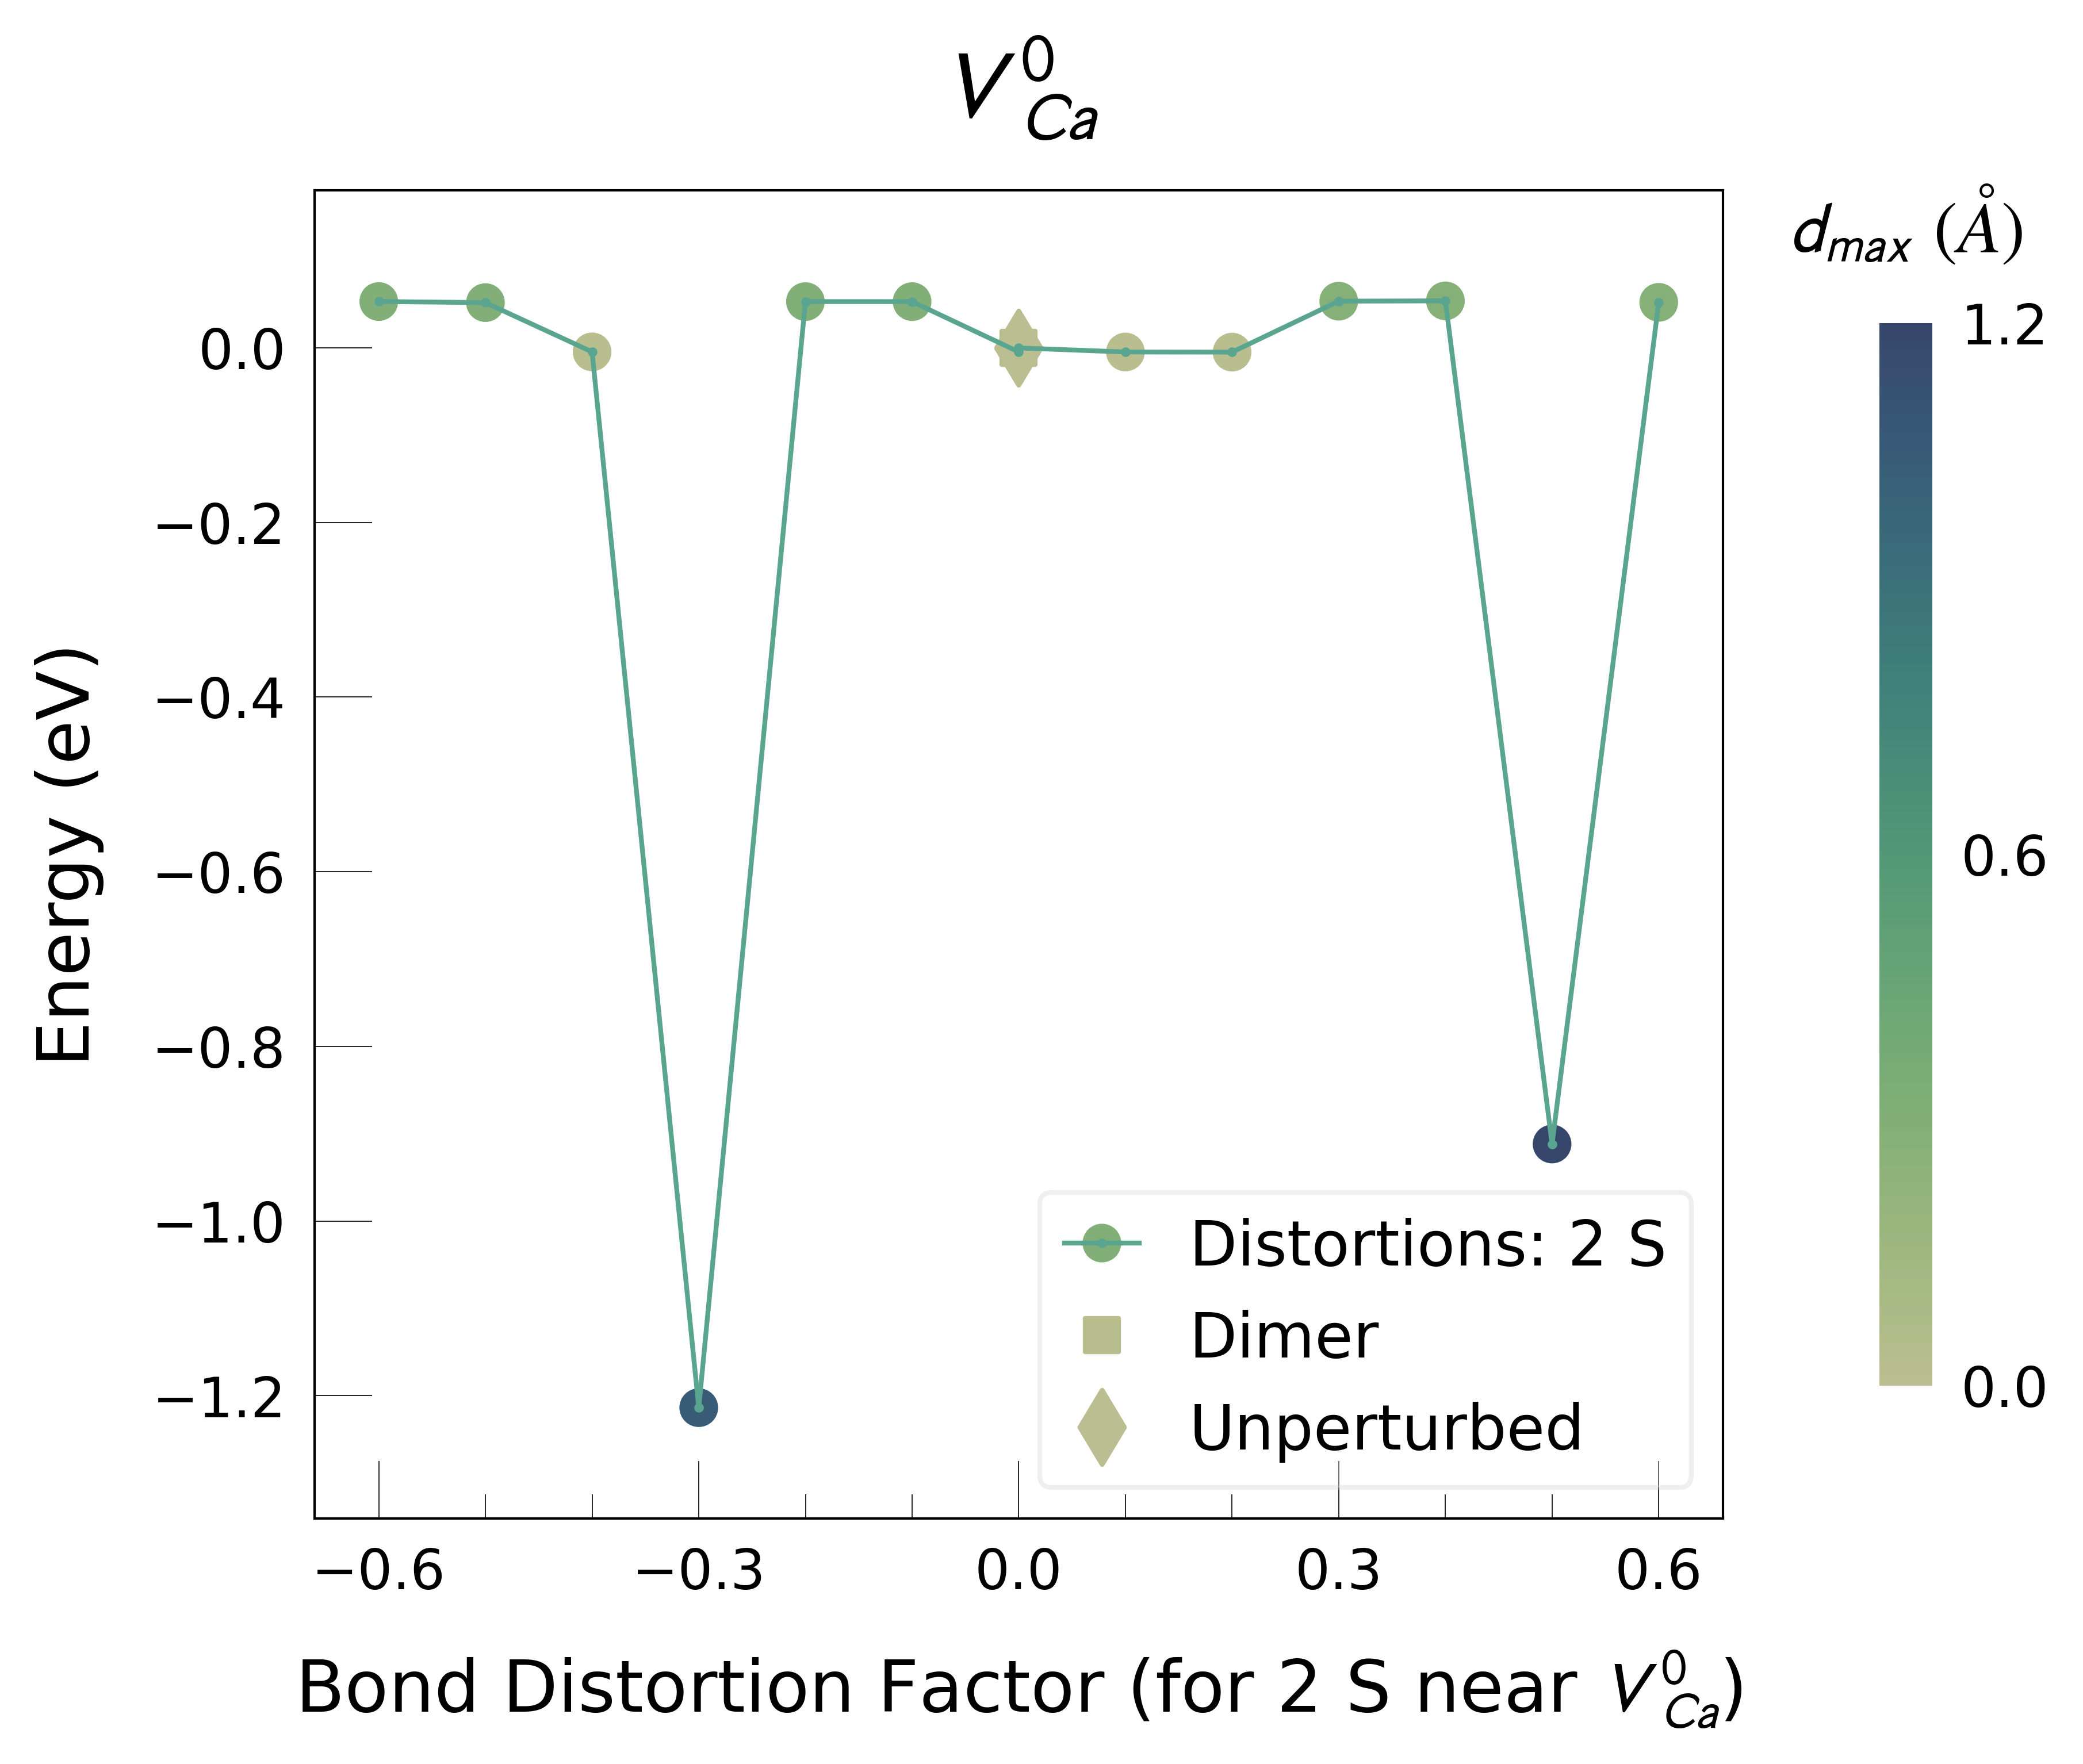

In [2]:
from shakenbreak.analysis import get_energies, get_structures
from shakenbreak.plotting import plot_defect

p = "/mnt/c/Users/Irea/OneDrive - Imperial College London/06_PhD/01_Year_1/03_Defects_db/02_Defects/03_Test/Ca2SnS4/"
defect_energies = get_energies(
    defect_species="v_Ca_s0_0", output_path=p
)
fig = plot_defect(
    defect_species="v_Ca_s0_0",
    output_path=p,
    energies_dict=defect_energies,
    add_colorbar=True,
    num_nearest_neighbours=2,
    neighbour_atom="S",
)

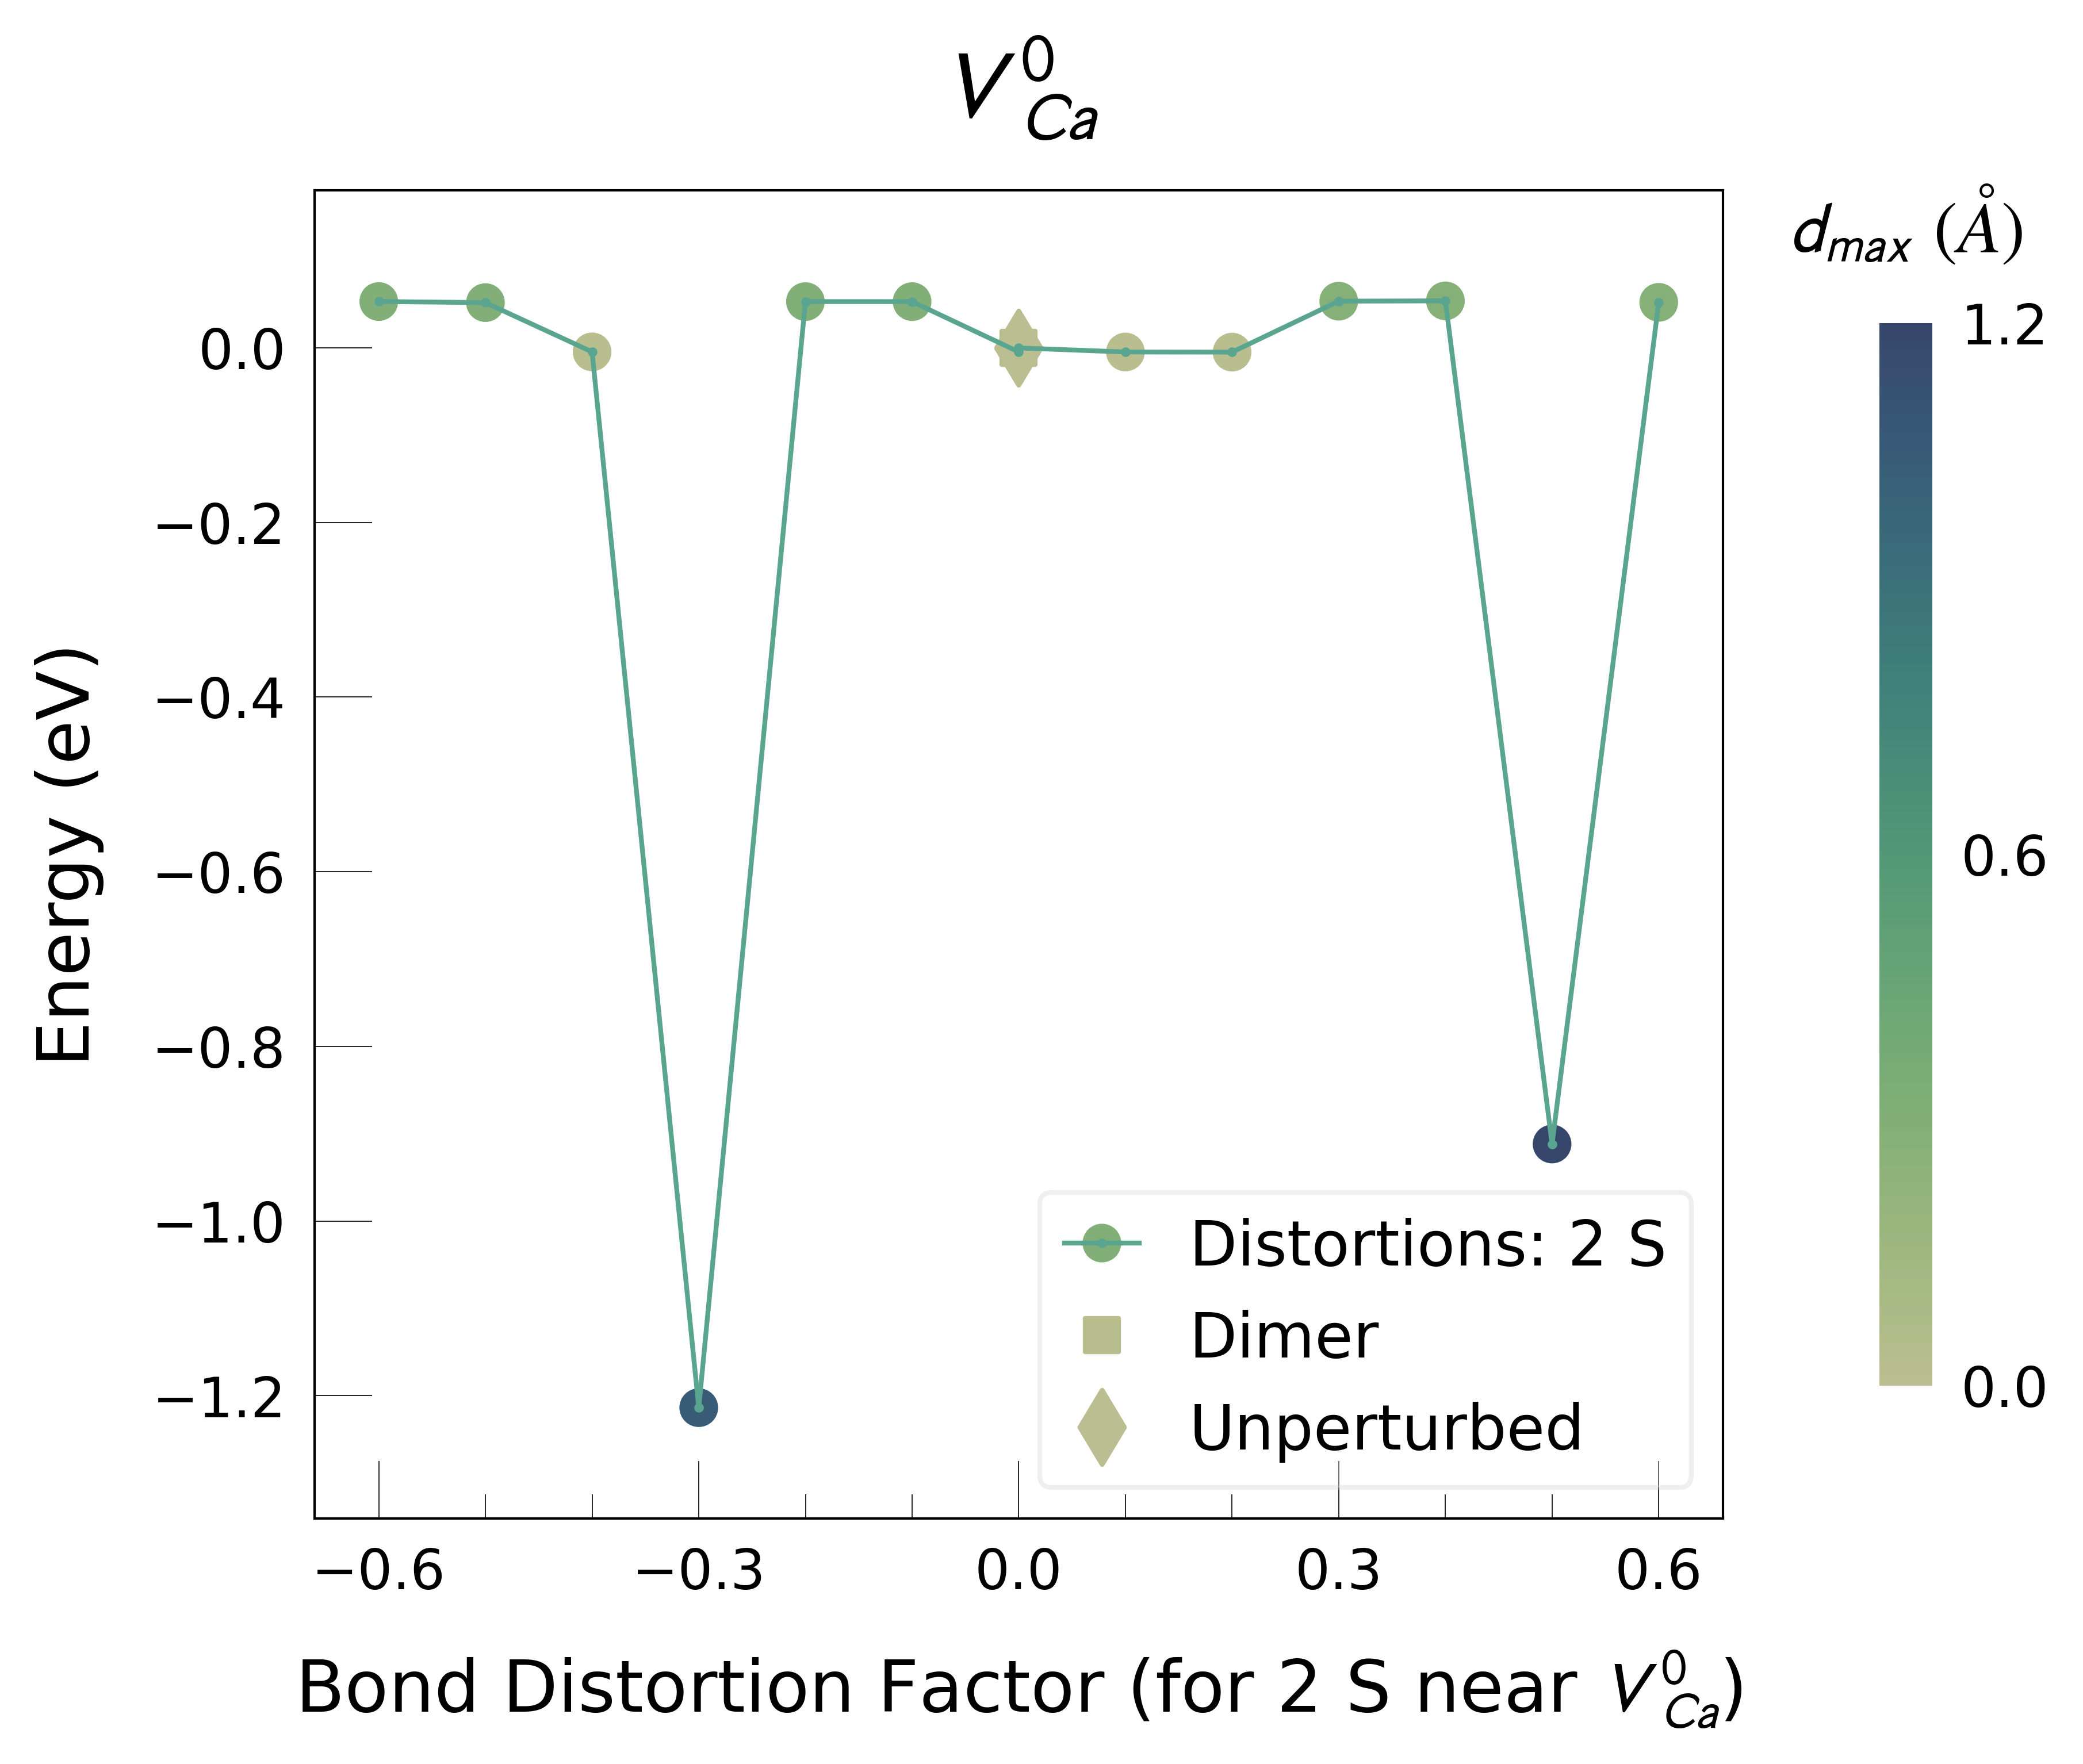

In [3]:
fig

In [22]:
# Get legend labels from figure
ax = fig.gca()
ax.get_legend_handles_labels()[1][0]

'Dimer'

In [26]:
ax.get_legend_handles_labels()[0][0].get_marker()

AttributeError: 'PathCollection' object has no attribute 'get_marker'

# Selecting atom indexes

Need to test on alloy, with mix of Te and Se sites

In [19]:
from monty.serialization import loadfn
import os
from pymatgen.core.structure import Structure

p = "/mnt/c/Users/Irea/OneDrive - Imperial College London/06_PhD/01_Year_1/03_Defects_db/03b_Alloys/01_CdTe/01_Defects/01_SnB/Subs_15/v_Cd_0"

s = Structure.from_file(os.path.join(p, "Unperturbed", "POSCAR"))
meta = loadfn(os.path.join(p, "distortion_metadata.json"))
coords = meta["defects"]["v_Cd"]['unique_site']

struc = s.copy()
struc.append("V", coords, coords_are_cartesian=False)
nn = struc.get_neighbors(struc[-1], r=3.0)
nn

[PeriodicNeighbor: Se (11.09, 4.841, 11.09) [0.8703, 0.3798, 0.8699],
 PeriodicNeighbor: Se (11.11, 7.948, 14.34) [0.8721, 0.6234, 1.125],
 PeriodicNeighbor: Te (14.31, 4.859, 14.39) [1.123, 0.3812, 1.129],
 PeriodicNeighbor: Te (14.28, 7.95, 11.17) [1.121, 0.6237, 0.8768]]

In [36]:
coords

[0.986350003237154, 0.4992578370461876, 0.9995065238765345]

In [22]:
nn_indexes = [n.index for n in nn]

In [25]:
nn_indexes

[62, 57, 36, 33]

In [30]:
from shakenbreak.input import identify_defect, _get_defect_entry_from_defect

defect_structure = s
bulk = s.copy()
bulk.append("Cd", coords, coords_are_cartesian=False)
defect = identify_defect(
    defect_structure=defect_structure,
    bulk_structure=bulk,
)
# Generate a defect entry for each charge state
defect_entry = _get_defect_entry_from_defect(
    defect=defect, charge_state=0
)
defect_entry

DefectEntry(defect=Cd Vacancy defect at site #63, charge_state=0, sc_entry=None ComputedStructureEntry - Cd31 Te17 Se15 (Cd31Te17Se15)
Energy (Uncorrected)     = 0.0000    eV (0.0000   eV/atom)
Correction               = 0.0000    eV (0.0000   eV/atom)
Energy (Final)           = 0.0000    eV (0.0000   eV/atom)
Energy Adjustments:
  None
Parameters:
Data:, corrections={}, corrections_metadata={}, sc_defect_frac_coords=array([0.98635   , 0.49925784, 0.99950652]), bulk_entry=None ComputedStructureEntry - Cd32 Te17 Se15 (Cd32Te17Se15)
Energy (Uncorrected)     = 0.0000    eV (0.0000   eV/atom)
Correction               = 0.0000    eV (0.0000   eV/atom)
Energy (Final)           = 0.0000    eV (0.0000   eV/atom)
Energy Adjustments:
  None
Parameters:
Data:, entry_id=None, name='v_Cd_C1_Se2.68_0', calculation_metadata={}, conventional_structure=None, conv_cell_frac_coords=None, equiv_conv_cell_frac_coords=[], _BilbaoCS_conv_cell_vector_mapping=[0, 1, 2], wyckoff=None, charge_state_guessing_log=

In [42]:
from shakenbreak.input import apply_snb_distortions

dist_dict = apply_snb_distortions(
    defect_entry=defect_entry,
    distorted_atoms=[33, 57], # Te, Se
    num_nearest_neighbours=2,
    bond_distortions=[-0.4,],
    verbose=True,
)

--Distortion -40.0%
	Defect Site Index / Frac Coords: [0.986 0.499 1.   ]
            Original Neighbour Distances: [(2.68, 58, 'Se'), (2.81, 34, 'Te')]
            Distorted Neighbour Distances:
	[(1.61, 58, 'Se'), (1.69, 34, 'Te')]


In [43]:
dist_dict.keys()

dict_keys(['Unperturbed', 'distortions', 'distortion_parameters'])

In [45]:
dist_dict["distortion_parameters"]["distorted_atoms"]

[(58, 'Se'), (34, 'Te')]

In [48]:
from shakenbreak.input import Distortions

dist = Distortions(
    defect_entries=[defect_entry,],
    distorted_atoms=[33, 57], # Te, Se
    # num_nearest_neighbours=2,
    bond_distortions=[-0.2,],
    # verbose=True,
)
output = dist.apply_distortions()

Oxidation states were not explicitly set, thus have been guessed as {'Cd': 2.0, 'Te': -2.0, 'Se': -2.0}. If this is unreasonable you should manually set oxidation_states
Applying ShakeNBreak... Will apply the following bond distortions: ['-0.2']. Then, will rattle with a std dev of 0.27 Å 


Defect: v_Cd_C1_Se2.68
Number of missing electrons in neutral state: 2

Defect v_Cd_C1_Se2.68 in charge state: 0. Number of distorted neighbours: 2


In [53]:
output[0]['v_Cd_C1_Se2.68'].keys()

dict_keys(['defect_type', 'defect_site', 'defect_supercell_site', 'defect_multiplicity', 'charges'])

In [59]:
output[1]['defects']['v_Cd_C1_Se2.68']["charges"][0]['distorted_atoms']

[(58, 'Se'), (34, 'Te')]

In [60]:
from shakenbreak.input import Distortions

dist = Distortions(
    defect_entries=[defect_entry,],
    distorted_atoms=[33,], # Te, Se
    # num_nearest_neighbours=2,
    bond_distortions=[-0.2,],
    # verbose=True,
)
output = dist.apply_distortions()

Oxidation states were not explicitly set, thus have been guessed as {'Cd': 2.0, 'Te': -2.0, 'Se': -2.0}. If this is unreasonable you should manually set oxidation_states
Applying ShakeNBreak... Will apply the following bond distortions: ['-0.2']. Then, will rattle with a std dev of 0.27 Å 


Defect: v_Cd_C1_Se2.68
Number of missing electrons in neutral state: 2

Defect v_Cd_C1_Se2.68 in charge state: 0. Number of distorted neighbours: 2


distortions.py:101: UserWarning: Only 1 atoms were specified to distort in `distorted_atoms`, but `num_nearest_neighbours` was set to 2. Will overide the indices specified in `distorted_atoms` and distort the 2 closest neighbours to the defect site.


In [61]:
output[1]['defects']['v_Cd_C1_Se2.68']["charges"][0]['distorted_atoms']

[(58, 'Se'), (63, 'Se')]